In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
get_ipython()

In [ ]:
import sys
import numpy as np 
import pandas as pd  
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving votes per city 2021.csv to votes per city 2021 (8).csv


In [ ]:
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

Running on CoLab


In [ ]:
import io

data_type = "city"
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) 
        df_2021 = df_2021[df_2021.columns[8:-1]] 
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) 
        df_2021 = df_2021[df_2021.columns[5:-1]] 



In [ ]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) 
df_2021 = df_2021[df_2021.columns[5:-1]] 



### **Question 1**

Text(0, 0.5, 'Number of localities')

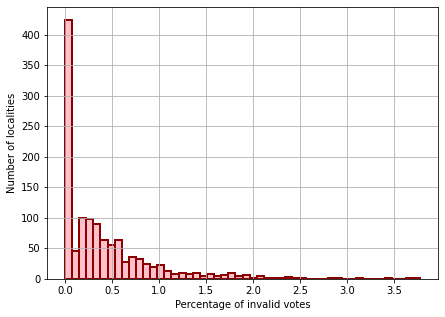

In [ ]:
# First show the histogram of the precentage of invalid votes per locality. 
Q1_hist = ((df_2021_raw['פסולים'].div(df_2021_raw['מצביעים']))*100).hist(bins = 50, edgecolor='darkred', color='pink', figsize=(7,5), linewidth=2)
Q1_hist.set_xlabel("Percentage of invalid votes")
Q1_hist.set_ylabel("Number of localities")




In [ ]:
# Write a function to find the top localities with the highest precentage of invalid votes. 
from IPython.display import display
def find_top_invalid_precentage_localities(df, num=3):
    votes_percent_per_city = df['פסולים'].div(df['מצביעים'])
    return votes_percent_per_city.sort_values(ascending=False).iloc[:num]

# now use the function to find the top 3
top = find_top_invalid_precentage_localities(df_2021_raw, 3)
top_3 = pd.DataFrame(top)

display(top_3.round(3))




,0
שם ישוב,
סואעד חמרייה,0.038
ניין,0.036
מאיר שפיה,0.034


 **Question 2**

In [ ]:
# first we will create a function that returns Parties that have passed the blocking percentage
def parties_above_blocking_precentage(df, threshold):
  precent = df.sum().div(df.sum().sum()).sort_values(ascending = False)
  return precent [precent > threshold]


In [ ]:
# creting a function that returns a plot of the voting precent in two cities
import matplotlib.pyplot as plt
def two_towns_dist(df, threshold, cityA, cityB):
  votes = parties_above_blocking_precentage(df, threshold)
  n = len(votes)
  places = votes.keys()
  width = 0.3

  r_names = [name[::-1] for name in list(places)]
  fig, ax = plt.subplots(figsize=(12,5))
  city_A_votes = df.loc[cityA, places]/ df.loc[cityA, places].sum()
  city_B_votes = df.loc[cityB, places]/ df.loc[cityB, places].sum()
  city_A_bar = ax.bar(np.arange(n), list(city_A_votes), width, color = 'lightblue')
  city_B_bar = ax.bar(np.arange(n)+width, list(city_B_votes), width, color = 'orange')

  ax.set_xlabel('parties name')
  ax.set_ylabel('vote precentage')
  ax.set_title('vote precentage per party 2021')
  ax.set_xticks(np.arange(n))
  ax.set_xticklabels(r_names)
  ax.legend((city_A_bar[0], city_B_bar[0]), (cityA[::-1], cityB[::-1]))
  plt.show()

  return fig, ax



In [ ]:
# creatin 3 lists of small cities (under 5000 voters), medium cities (between 5000 and 50000 voters) and large cities (above 50000 voters).
df_2021_Q2 = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8')
city = df_2021_Q2[['מצביעים', 'שם ישוב']]

large_city = city.sort_values(by='מצביעים', ascending = False)

medium_city = city.query('5000 < מצביעים')
medium_city = medium_city.query('מצביעים < 50000')
medium_city = medium_city.sort_values(by = 'מצביעים', ascending = False)

small_city = city.query('מצביעים < 5000')
small_city = small_city.sort_values(by = 'מצביעים', ascending = False)


**plot of two large cities**

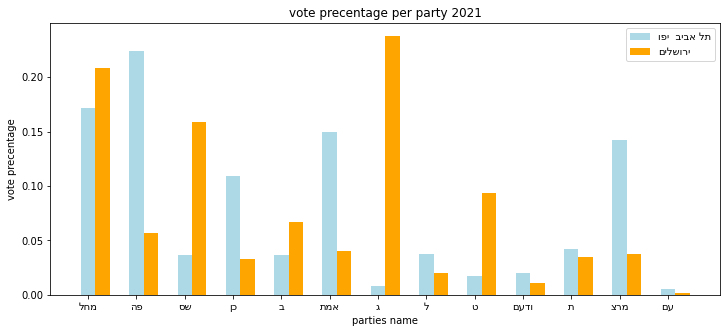

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe591781290>)

In [ ]:
two_towns_dist(df_2021, 0.0325, large_city['שם ישוב'].values[1], large_city['שם ישוב'].values[2])


**plot of two medium cities**

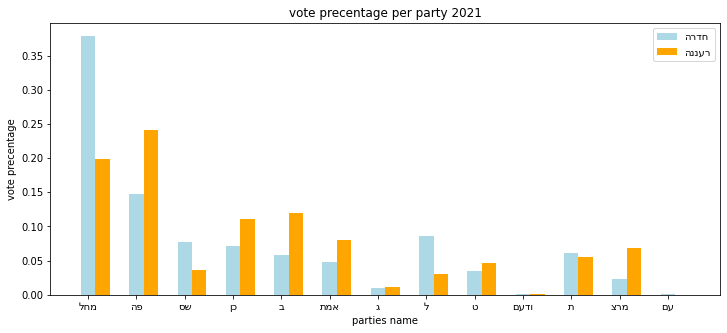

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe59272fe10>)

In [ ]:
two_towns_dist(df_2021, 0.0325, medium_city['שם ישוב'].values[1], medium_city['שם ישוב'].values[2])

**plot of two small cities**

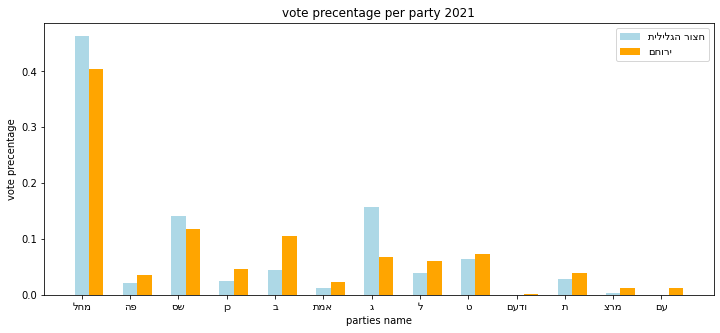

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe5920254d0>)

In [ ]:
two_towns_dist(df_2021, 0.0325, small_city['שם ישוב'].values[1], small_city['שם ישוב'].values[2])



 **Question 3**

In [ ]:

def similar_dist(df, thresh, city):
    width = 0.3   
    votes = parties_above_blocking_precentage(df, thresh)  
    # Using the function from Q 2
    n = len(votes)  
    places = votes.keys()

    rev_names = [name[::-1] for name in list(places)]
    fig, ax = plt.subplots(figsize=(12,5))  

    city_votes = df.loc[city,places] / df.loc[city,places].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='gray')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='b')

    ax.set_xlabel('Parties In IL')
    ax.set_ylabel('Precentage of  Votes')
    ax.set_title('Votes percent per party for  2021')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax


In [ ]:
def dist_country_city(df):
  # Voting in all of israel
  p_country = df.sum(axis = 0).div(df.sum().sum())

  cities = df.index.drop('מעטפות חיצוניות') 
  dist = {}

  for c in cities:  
    p_city = df_2021.loc[c] / df_2021.loc[c].sum()
    dist[c] = ((p_city - p_country)**2).sum()
  return max(dist, key = dist.get),min(dist, key = dist.get)




Sub-section a

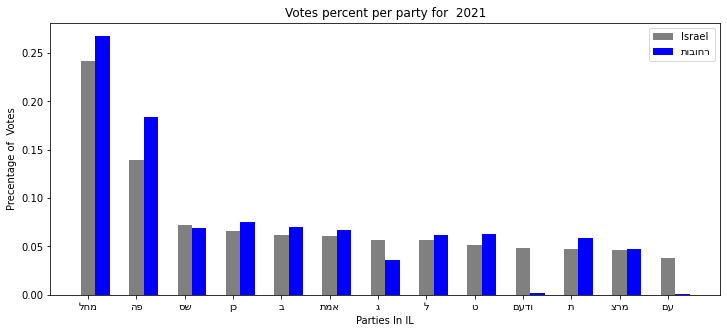

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe591df32d0>)

In [ ]:

similaities_insimilarities = dist_country_city(df_2021)
similar_dist(df_2021,0.035,similaities_insimilarities[1])


As shown in above, plot a which display the districution of Rehovet, aimed to be as shown in the general distribution in Israel (first 7 parties).

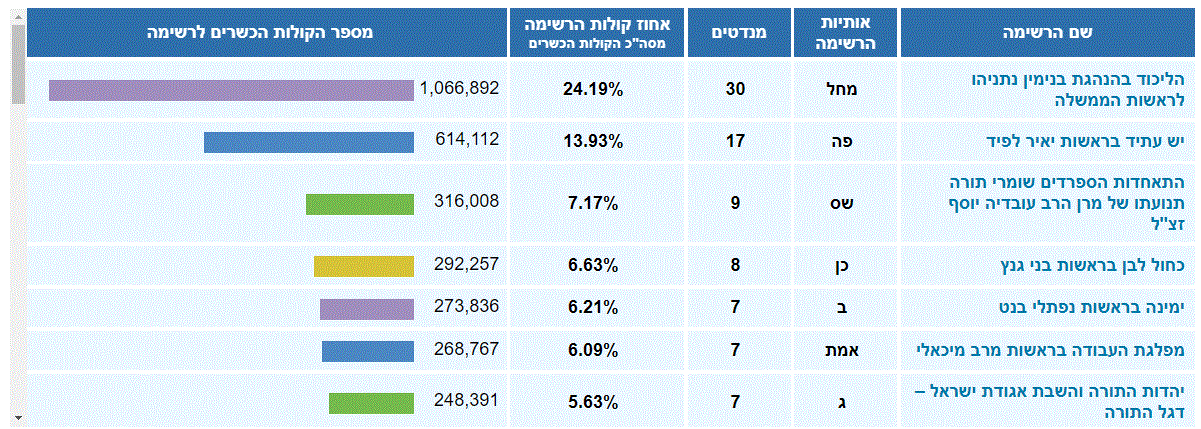


Sub-section b

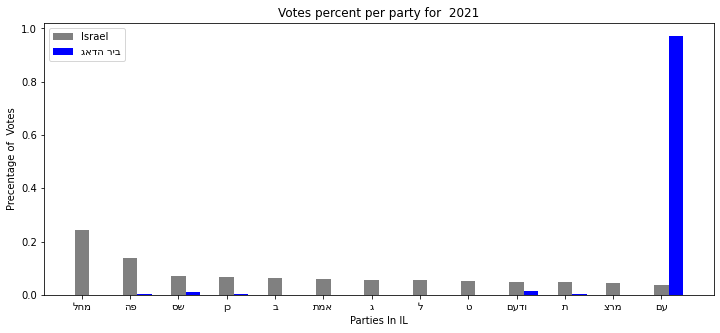

(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe591ef97d0>)

In [ ]:

similar_dist(df_2021,0.035,similaities_insimilarities[0]) 


As shown in above, plot b which display the districution of Bir-Hdag, a Beduijan village, aimed to the opposite of the general distribution in Israel.